In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [66]:
train_path = 'chest_xray/train'
test_path = 'chest_xray/test'
valid_path = 'chest_xray/val'

In [83]:
#Some Basic Imports
import matplotlib.pyplot as plt #For Visualization
import numpy as np              #For handling arrays
import pandas as pd             # For handling data
#Define Directories for train, test & Validation Set
train_path = 'chest_xray/train'
test_path = 'chest_xray/test'
valid_path = 'chest_xray/val'
#Define some often used standard parameters
#The batch refers to the number of training examples utilized in one #iteration
batch_size = 16
#The dimension of the images we are going to define is 500x500 img_height = 500
img_height = 500
img_width = 500

In [84]:
from keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,

                               )

test_data_gen = ImageDataGenerator(rescale = 1./255)



train = image_gen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=batch_size
                                      )

test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',shuffle=False,
      class_mode='binary',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


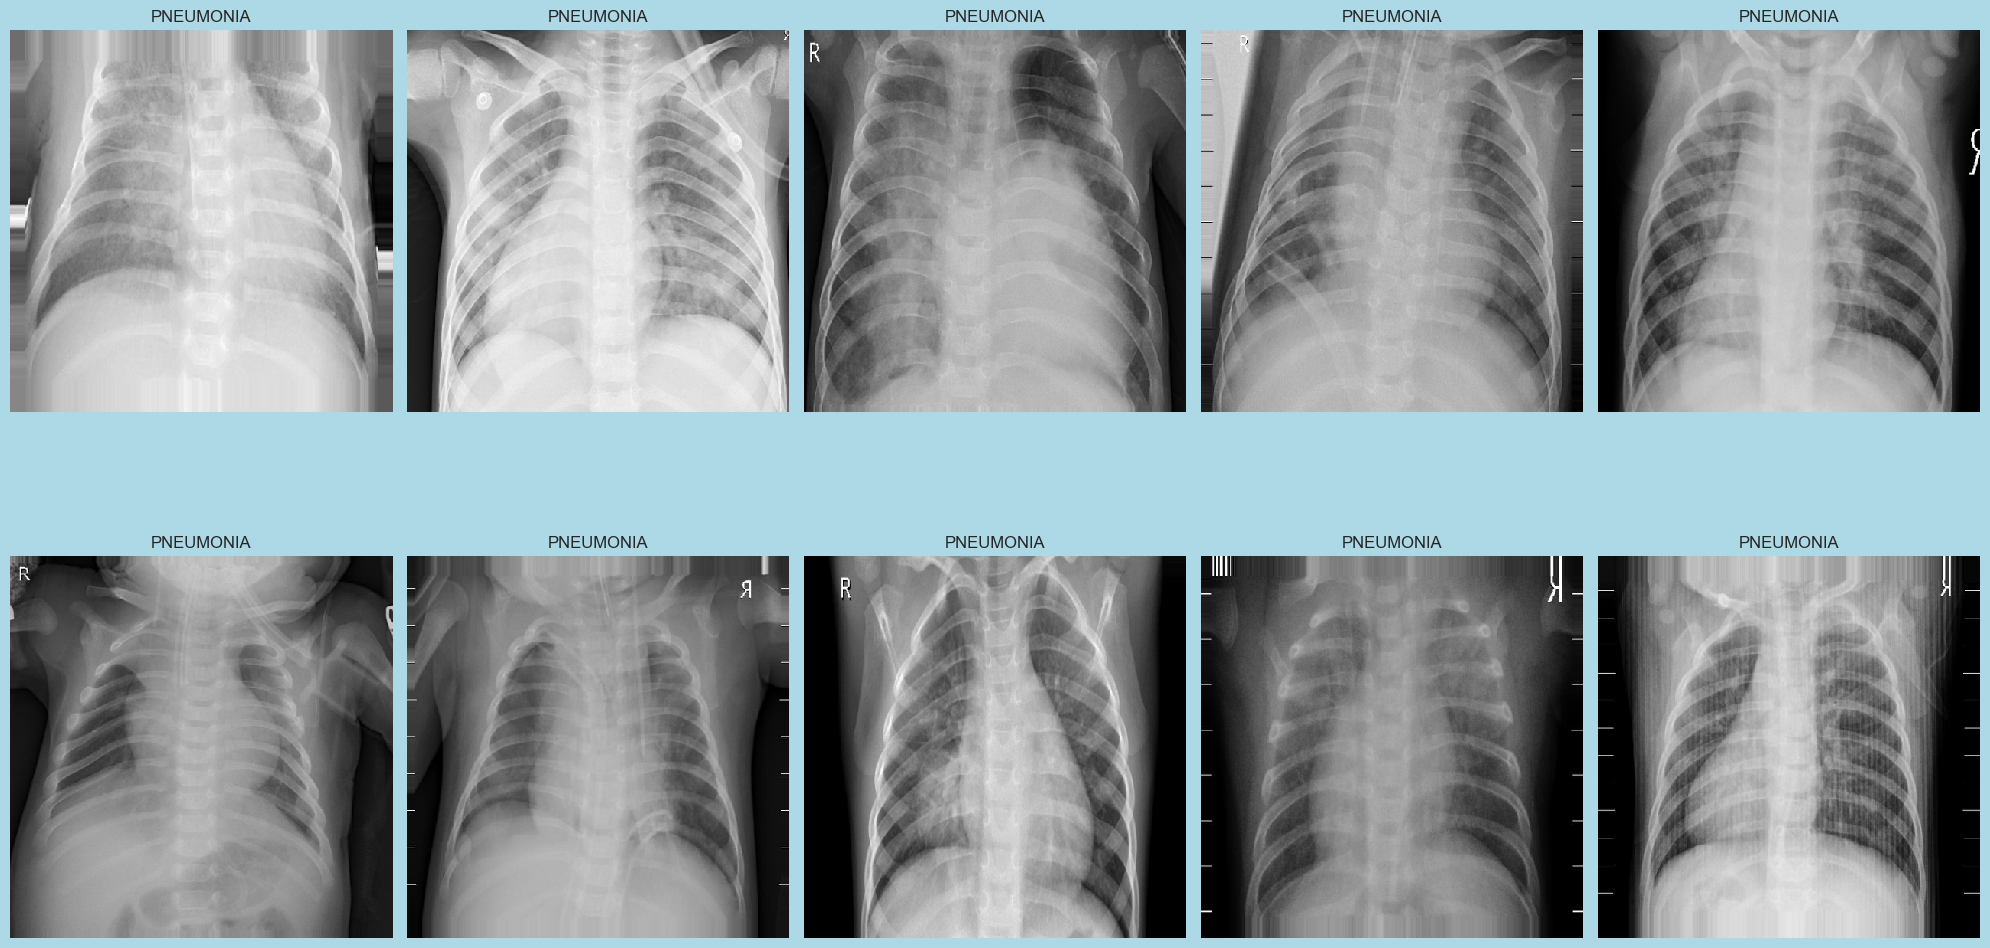

In [85]:
plt.figure(figsize=(20, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]
        dic = {0:'NORMAL', 1:'PNEUMONIA'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [86]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [87]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [88]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 498, 498, 32)      320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 249, 249, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 247, 247, 32)      9248      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 123, 123, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 60, 60, 32)      

In [92]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [94]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train.classes),
                                        y = train.classes
                                    )
cw = dict(zip( np.unique(train.classes), weights))
print(cw)

{0: 1.9448173005219984, 1: 0.6730322580645162}


In [95]:
cnn.fit(train,epochs=5, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

Epoch 1/5
326/326 [==============================] - 211s 644ms/step - loss: 0.3958 - accuracy: 0.7789 - val_loss: 1.1859 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 2/5
326/326 [==============================] - 207s 633ms/step - loss: 0.2404 - accuracy: 0.9053 - val_loss: 0.9417 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/5
326/326 [==============================] - 206s 631ms/step - loss: 0.2223 - accuracy: 0.9135 - val_loss: 0.5609 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/5
326/326 [==============================] - 202s 620ms/step - loss: 0.1905 - accuracy: 0.9317 - val_loss: 0.4939 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/5
326/326 [==============================] - 202s 620ms/step - loss: 0.1792 - accuracy: 0.9312 - val_loss: 0.6445 - val_accuracy: 0.7500 - lr: 0.0010


<AxesSubplot: >

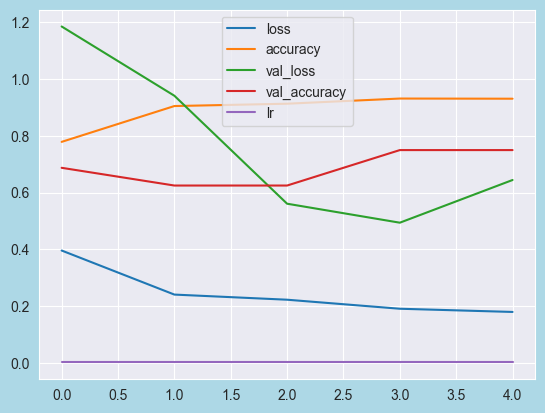

In [96]:
pd.DataFrame(cnn.history.history).plot()

In [97]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

39/39 [==============================] - 4s 113ms/step - loss: 0.3383 - accuracy: 0.8958
The testing accuracy is : 89.58333134651184 %


In [98]:
preds = cnn.predict(test,verbose=1)

39/39 [==============================] - 5s 115ms/step


In [99]:
#Map the predictions to 0 and 1's, useful for printing later.
#If its < 50% chance of the patient having pneumonia we mark this as 0, and 1 for vice versa
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

<AxesSubplot: >

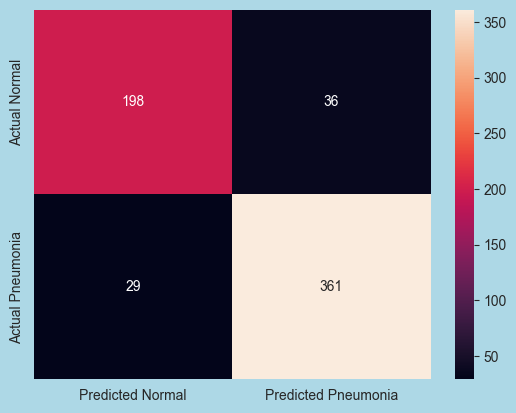

In [100]:
#Display a confusion matrix on the results from the test data.
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [101]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.87      0.85      0.86       234
   PNEUMONIA       0.91      0.93      0.92       390

    accuracy                           0.90       624
   macro avg       0.89      0.89      0.89       624
weighted avg       0.90      0.90      0.90       624



(624, 500, 500, 1)
(624,)


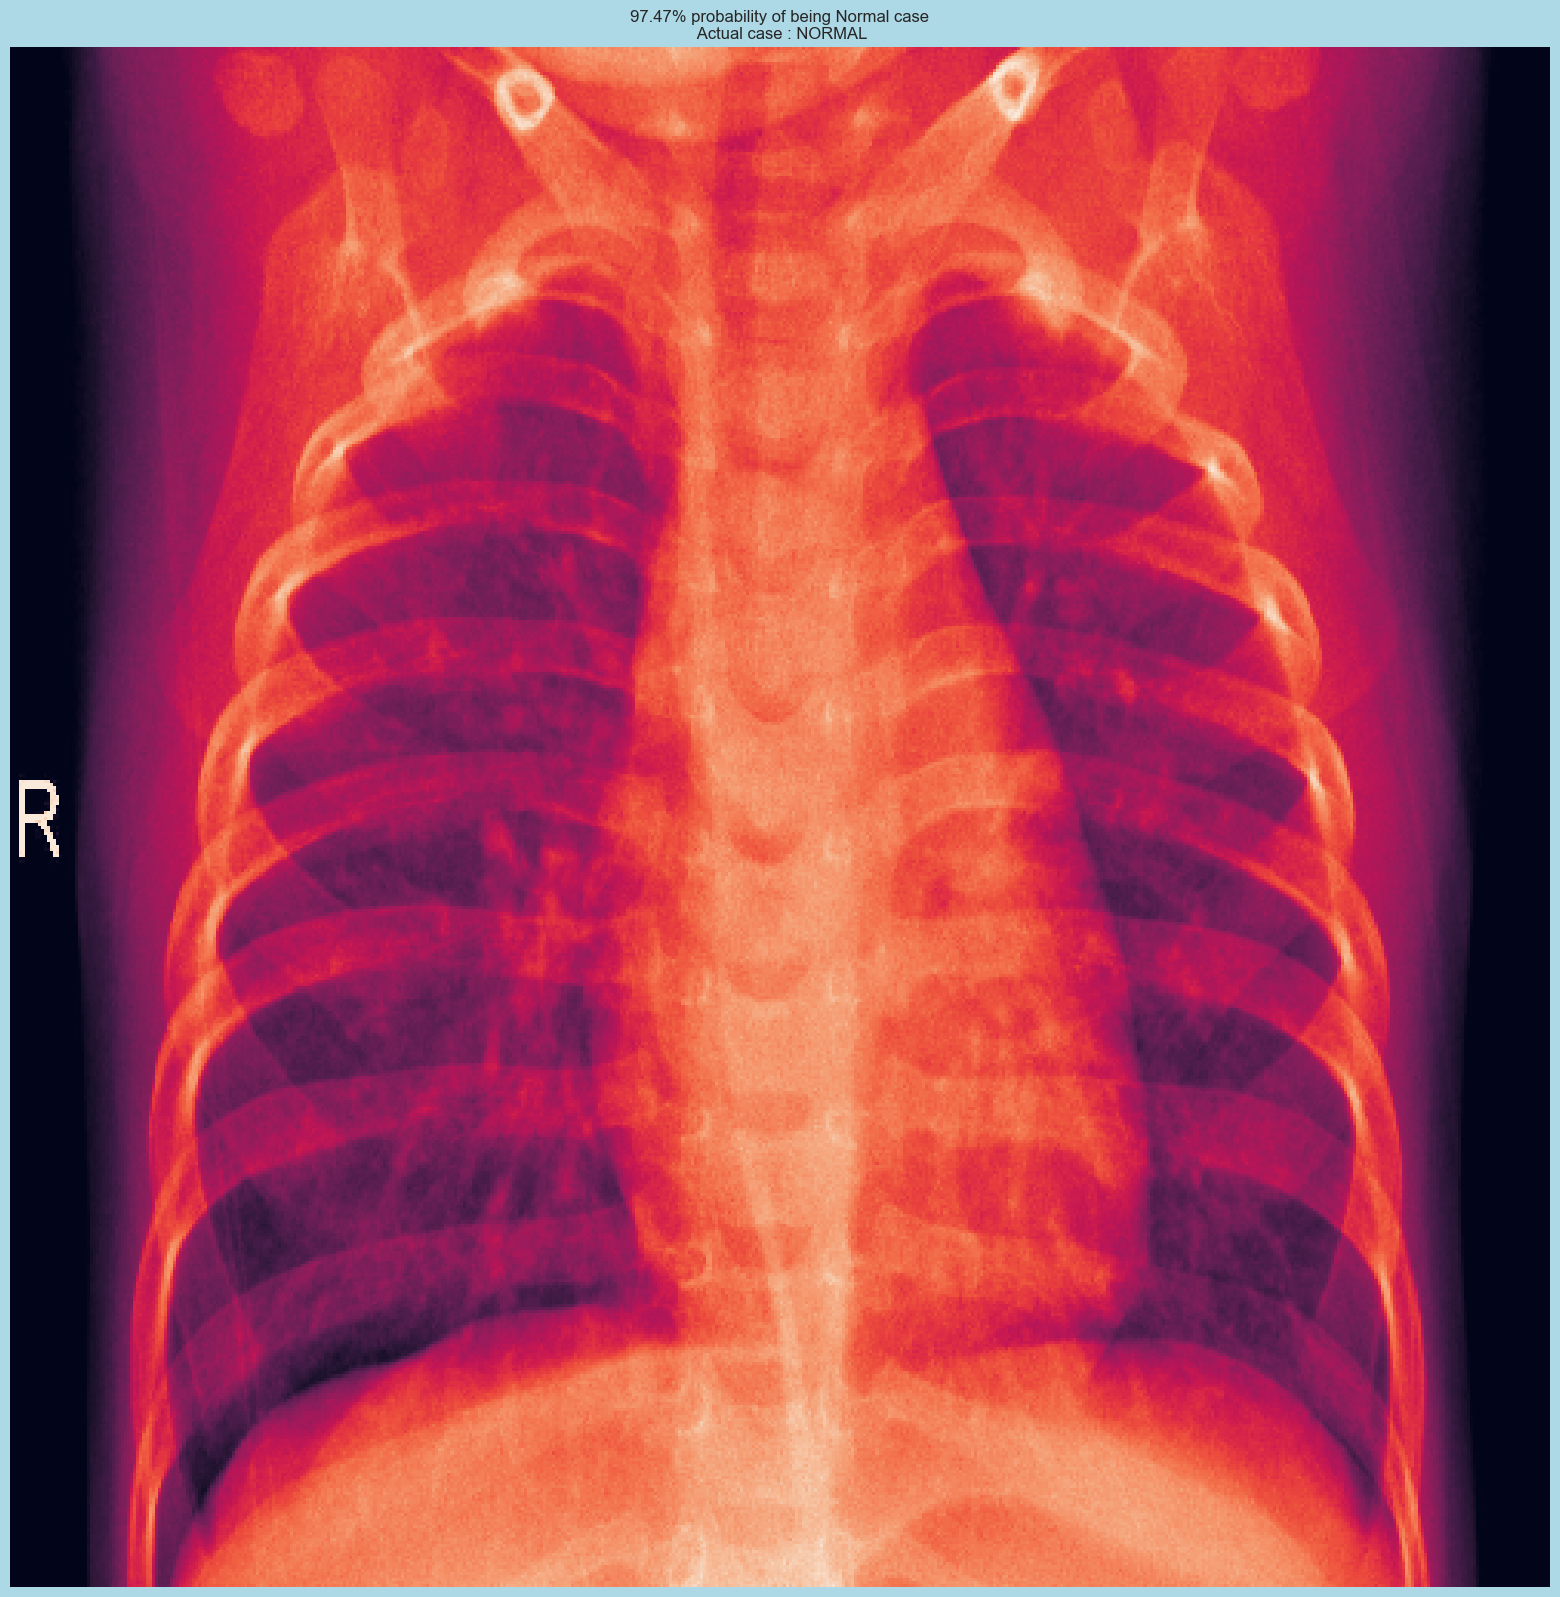

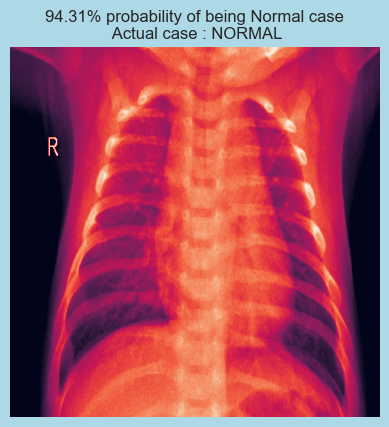

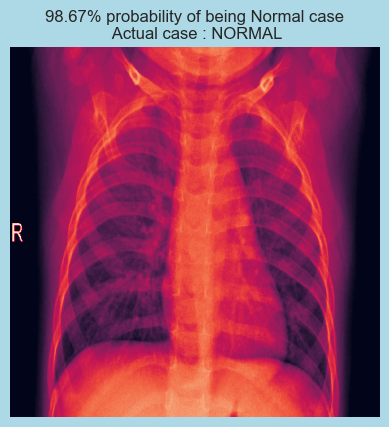

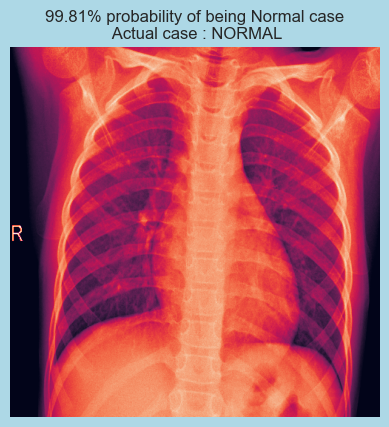

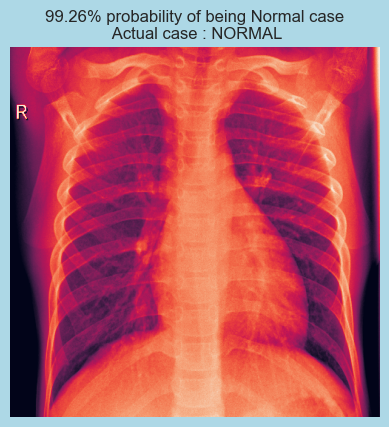

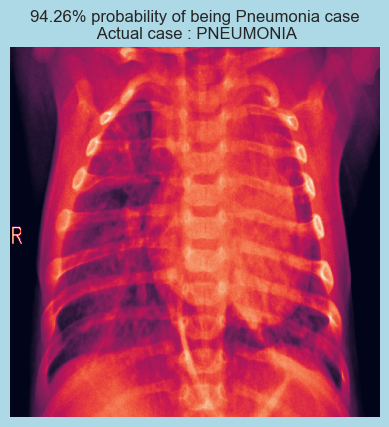

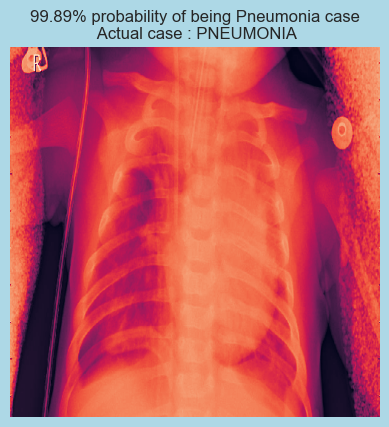

In [108]:
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)

'''
Iterate through the results and print them. Also, extracts the images so they are visible for the reader.
'''
#this little code above extracts the images from test Data iterator without shuffling the sequence
# x contains image array and y has labels
dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(20,20))
for i in range(228, 9+228):
  if preds[i, 0] >= 0.5:
    out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][0]))
    plt.title(out+"\n Actual case : "+ dic.get(y[i]))
    plt.imshow(np.squeeze(x[i]))
    plt.axis('off')
    plt.show()

  else:
    out = ('{:.2%} probability of being Normal case'.format(1-preds[i][0]))
    plt.title(out+"\n Actual case : "+ dic.get(y[i]))
    plt.imshow(np.squeeze(x[i]))
    plt.axis('off')
    plt.show()
